# Investigating Home Loan Approvals in the US

In [463]:
# Program Purpose:
# Explain why some individual's home loans are accepted vs rejected 
# Functionality : 
# intake data on home loans & demographic, create visualizations and statistical conclusions
# dataset link: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # suppress warning for overwriting dataframe

main_df = pd.read_csv('loan_sanction_train.csv')
print(main_df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

### Clean & Explore Data

In [464]:
cols = main_df.columns.tolist()
        
# Replacing blank/nans with appropriate values
# Gender
main_df = main_df[main_df['Gender'].notna()]
main_df['Gender'] = main_df['Gender'].astype(str)
# Married
main_df['Married'] = main_df['Married'].replace('','No')
main_df['Married'] = main_df['Married'].fillna('No')
# Dependents
main_df['Dependents'] = main_df['Dependents'].replace('','0')
main_df['Dependents'] = main_df['Dependents'].fillna('0')
# Self Employed
main_df['Self_Employed'] = main_df['Self_Employed'].replace('','No')
main_df['Self_Employed'] = main_df['Self_Employed'].fillna('No')
# Loan Amount
main_df = main_df[main_df['LoanAmount'].notna()]
# Loan Term
main_df = main_df[main_df['Loan_Amount_Term'].notna()]
# Credit History
main_df['Credit_History'] = main_df['Credit_History'].fillna(0.0)
main_df['Credit_History'] = main_df['Credit_History'].replace('', 0.0)

# Applicant Income
main_df['ApplicantIncome'] = main_df['ApplicantIncome'].astype(int)

# Encode Loan Approval Status
main_df['Loan_Status'] = main_df['Credit_History'].replace({'Y':'1','N':'0'})

# print(main_df.isna().any())
# Approved loans
for col in cols:
    if col != 'Loan_ID':
        print(main_df[col].value_counts())
        print('\n')

Male      459
Female    106
Name: Gender, dtype: int64


Yes    365
No     200
Name: Married, dtype: int64


0     328
1      96
2      96
3+     45
Name: Dependents, dtype: int64


Graduate        445
Not Graduate    120
Name: Education, dtype: int64


No     492
Yes     73
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
5000    5
3333    5
       ..
3727    1
150     1
3850    1
7787    1
7583    1
Name: ApplicantIncome, Length: 463, dtype: int64


0.0       250
2500.0      5
1666.0      5
2083.0      5
1625.0      3
         ... 
2383.0      1
2791.0      1
1695.0      1
1779.0      1
240.0       1
Name: CoapplicantIncome, Length: 267, dtype: int64


120.0    18
110.0    15
100.0    14
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64


360.0    482
180.0     41
480.0     15
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

### Examine Correlations for Loan Status

In [465]:
# Quantitative
print(main_df.corr()['Loan_Status'])

ApplicantIncome     -0.014700
CoapplicantIncome   -0.064235
LoanAmount          -0.056126
Loan_Amount_Term     0.017685
Credit_History       1.000000
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


In [466]:
# Categorical

dummy_df = main_df[['Loan_Status','Married','Education','Self_Employed','Property_Area']]
dummy_df = pd.get_dummies(dummy_df, columns = ['Married','Education','Self_Employed','Property_Area'])
print(dummy_df.corr()['Loan_Status'])

Loan_Status                1.000000
Married_No                 0.016935
Married_Yes               -0.016935
Education_Graduate         0.069673
Education_Not Graduate    -0.069673
Self_Employed_No           0.012478
Self_Employed_Yes         -0.012478
Property_Area_Rural       -0.007407
Property_Area_Semiurban    0.053223
Property_Area_Urban       -0.048353
Name: Loan_Status, dtype: float64


*It appears the strongest correlation lies in the Credit History factor. We'll examine the number of individuals with/without credit histories to see if other prominent traits emerge.*

### Split & Further Investigate Data

In [467]:
print(cols)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [468]:
# Import a function to find the number of individuals per category
import ipynb
from ipynb.fs.full.identity_class import identity


In [469]:
app_loan_df = main_df[main_df.Loan_Status == 1.0]
unapp_loan_df = main_df[main_df.Loan_Status == 0.0]

print(f'{len(app_loan_df)} approved loans')
print(f'{len(unapp_loan_df)} unapproved loans')

441 approved loans
124 unapproved loans


In [470]:
# Approved loans
for col in cols:
    if col != 'Loan_ID':
        print(app_loan_df[col].value_counts())
        print('\n')

Male      361
Female     80
Name: Gender, dtype: int64


Yes    283
No     158
Name: Married, dtype: int64


0     257
2      79
1      72
3+     33
Name: Dependents, dtype: int64


Graduate        354
Not Graduate     87
Name: Education, dtype: int64


No     385
Yes     56
Name: Self_Employed, dtype: int64


2500    8
4583    5
3750    5
6000    4
8333    4
       ..
3850    1
7787    1
3975    1
3244    1
7583    1
Name: ApplicantIncome, Length: 375, dtype: int64


0.0       197
2083.0      5
1666.0      4
2500.0      4
1750.0      3
         ... 
1800.0      1
1775.0      1
2791.0      1
1695.0      1
240.0       1
Name: CoapplicantIncome, Length: 210, dtype: int64


120.0    15
110.0    14
100.0    12
187.0    11
113.0     9
         ..
42.0      1
240.0     1
214.0     1
127.0     1
253.0     1
Name: LoanAmount, Length: 172, dtype: int64


360.0    383
180.0     30
480.0     10
300.0      6
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, d

In [471]:
# Unapproved loans
for col in cols:
    if col != 'Loan_ID':
        print(unapp_loan_df[col].value_counts())
        print('\n')

Male      98
Female    26
Name: Gender, dtype: int64


Yes    82
No     42
Name: Married, dtype: int64


0     71
1     24
2     17
3+    12
Name: Dependents, dtype: int64


Graduate        91
Not Graduate    33
Name: Education, dtype: int64


No     107
Yes     17
Name: Self_Employed, dtype: int64


4166    3
6000    2
5000    2
3166    2
2400    2
       ..
4283    1
3430    1
4923    1
3416    1
4583    1
Name: ApplicantIncome, Length: 116, dtype: int64


0.0        53
1800.0      2
1451.0      2
3033.0      1
1987.0      1
           ..
2426.0      1
2934.0      1
1863.0      1
2134.0      1
41667.0     1
Name: CoapplicantIncome, Length: 70, dtype: int64


160.0    4
130.0    3
104.0    3
93.0     3
120.0    3
        ..
72.0     1
166.0    1
58.0     1
66.0     1
133.0    1
Name: LoanAmount, Length: 93, dtype: int64


360.0    99
180.0    11
300.0     6
480.0     5
240.0     1
84.0      1
12.0      1
Name: Loan_Amount_Term, dtype: int64


0.0    124
Name: Credit_History, dtype: in

### Visualize Data

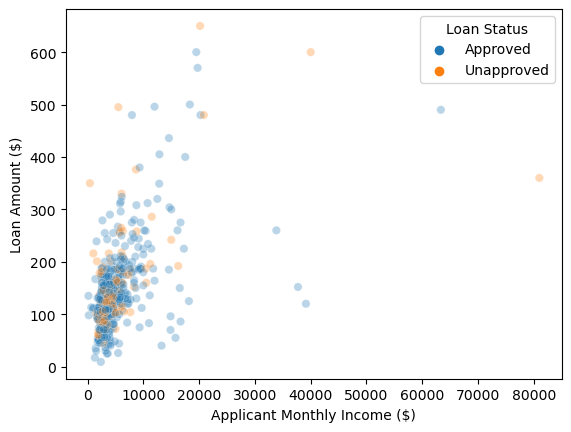

In [472]:
# Loan Amoun vs Income
main_df['Loan_Status'] = main_df['Loan_Status'].replace({1.0:'Approved',0.0:'Unapproved'})
ax = sns.scatterplot(data = main_df, x = 'ApplicantIncome', y = 'LoanAmount',hue = 'Loan_Status', alpha = 0.3)
ax.set_xlabel('Applicant Monthly Income ($)')
ax.set_ylabel('Loan Amount ($)')
plt.legend(title = 'Loan Status')
plt.show()

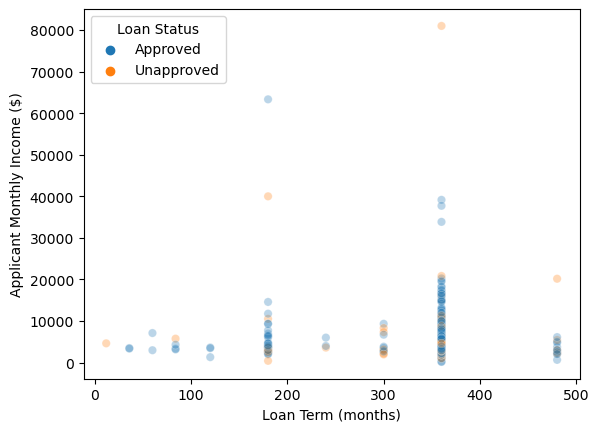

In [473]:
# Loan Term vs Income
ax = sns.scatterplot(data = main_df, x = 'Loan_Amount_Term', y ='ApplicantIncome',hue = 'Loan_Status', alpha = 0.3)
ax.set_xlabel('Loan Term (months)')
ax.set_ylabel('Applicant Monthly Income ($)')
plt.legend(title = 'Loan Status')
plt.show()

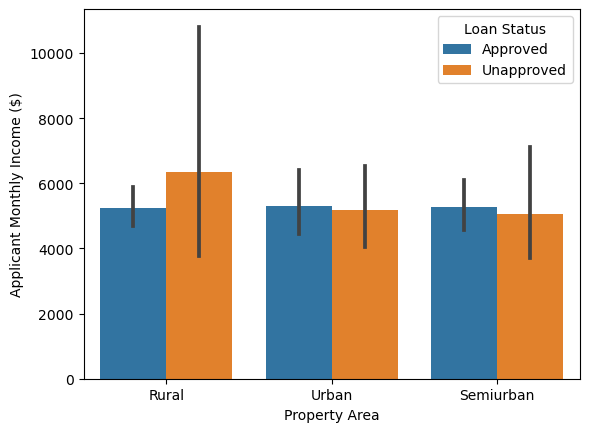

In [474]:
# Income vs Region

ax = sns.barplot(data = main_df, x = 'Property_Area', y = 'ApplicantIncome', hue = 'Loan_Status')
ax.set_ylabel('Applicant Monthly Income ($)')
ax.set_xlabel('Property Area')
plt.legend(title = 'Loan Status')
plt.show()

*One interesting conclusion that can be seen here is that rural individuals whose loans are unapproved have a higher average income that those who are approved.*

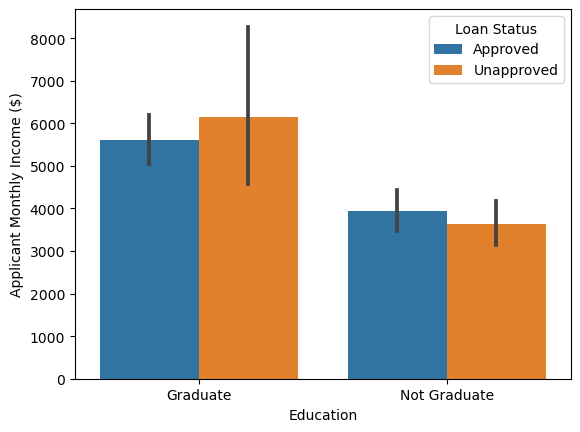

In [475]:
# Income vs Education

ax = sns.barplot(data = main_df, x = 'Education', y = 'ApplicantIncome', hue = 'Loan_Status')
ax.set_ylabel('Applicant Monthly Income ($)')
ax.set_xlabel('Education')
plt.legend(title = 'Loan Status')
plt.show()

*Another interesting conclusion illustrated here is that graduated individuals whose loans are unapproved have a higher average income that those who are approved, similar to those that live in rural areas.*

### Application of Machine Learning: Linear & Logistic Regression

In [476]:
# Split Data into Linear and Logistic Datasets

from sklearn.model_selection import train_test_split

# Create Linear & Logistic Features and loan statuses dataframes/series 
lin_features = main_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].astype(float)
log_features = main_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                        'Credit_History', 'Property_Area']]

loan_statuses = main_df['Loan_Status'].replace({'Approved':1, 'Unapproved':0})

In [477]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Split data for training/testing
x_train, x_test, y_train, y_test = train_test_split(lin_features, loan_statuses)
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Training R\u00B2 : {round(model.score(x_train, y_train),3)}%")
print(f"Testing R\u00B2 : {round(model.score(x_test, y_test),3)}%")

Training R² : 0.013%
Testing R² : -0.023%


*The Linear Regression model has pitiful $R^2$ scores, so it's not worth further investigation.*

In [478]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Transform categorical data for logistic regression model
print(log_features.columns)
log_features['Gender'] = log_features['Gender'].replace({'Female':1,'Male':0})
log_features['Married'] = log_features['Married'].replace({'Yes':1,'No':0})
log_features['Dependents'] = log_features['Dependents'].apply(lambda x:1 if int(x[0])>0 else 0)
log_features['Education'] = log_features['Education'].replace({'Graduate':1,'Not Graduate':0})
log_features['Self_Employed'] = log_features['Self_Employed'].replace({'Yes':1,'No':0})
log_features = pd.get_dummies(log_features, columns = ['Property_Area'])



Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')


In [479]:
# Split data for training/testing
x_train, x_test, y_train, y_test = train_test_split(log_features, loan_statuses)
# Create Scaler so data can be normalized and be used in sklearn's logistic model
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train.values)
x_test_scale = scaler.transform(x_test.values)

# Create, train, and score the model
model = LogisticRegression()
model.fit(x_train_scale,y_train)
print(f'The logistic model is {round(model.score(x_test.values, y_test)*100,2)}% accurate.')

The logistic model is 77.46% accurate.


In [480]:
# Predicting Whether an Individual's Loan is approved (1 - approved, 0 - unapproved):
import numpy as np

# Example Profile 1: a single man with no children who graduated highschool, is not self employed, 
# has a credit history, and lives in an urban area

ex_prof1 = np.array([0,0,0,1,0,1,0,0,1]).reshape(1,-1)
print(model.predict(scaler.transform(ex_prof1))[0])

# Example Profile 2: all the same as 1, but with no credit history
ex_prof2 = np.array([0,0,0,1,0,0,0,0,1]).reshape(1,-1)
print(model.predict(scaler.transform(ex_prof2))[0])

# Example Profile 3: all the same as 1, but female
ex_prof3 = np.array([1,0,0,1,0,1,0,0,1]).reshape(1,-1)
print(model.predict(scaler.transform(ex_prof3))[0])

# Example Profile 4: all the same as 3, but with no credit history
ex_prof4 = np.array([1,0,0,1,0,0,0,0,1]).reshape(1,-1)
print(model.predict(scaler.transform(ex_prof4))[0])

1
0
1
0
